# **Graduate Admission Prediction**
Dataset obtained from: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

It contains the following attributes which are considered important in the selection process of graduate students:

1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose (strength out of 5)
5. Letter of Recommendation (strength out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

---

# Requirements


In [262]:
# Basic dataframe and array manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [55]:
# add dataset to the content directory on the left
df = pd.read_csv('/content/admission_prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
# shuffling the data
df_shuffled = shuffle(df, random_state=42)
df_shuffled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
361,362,334,116,4,4.0,3.5,9.54,1,0.93
73,74,314,108,4,4.5,4.0,9.04,1,0.84
374,375,315,105,2,2.0,2.5,7.65,0,0.39
155,156,312,109,3,3.0,3.0,8.69,0,0.77
104,105,326,112,3,3.5,3.0,9.05,1,0.74


# Question A
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [57]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 361 to 102
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 39.1 KB


*   There are 9 attributes.  
*   There are 500 instances/entries in the dataset.
*   The 4 attributes printed below are continuous-valued:

In [58]:
df_shuffled.select_dtypes(include=['float64']).columns.tolist()

['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

Note: As detailed below, SOP and LOR are assumed to take on any values from 0 to 5 (not only categorical grades)

In [59]:
df_shuffled['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [60]:
df_shuffled['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [61]:
df_shuffled['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [62]:
df_shuffled['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

*   When it comes to categorical attributes, there are some initial assumptions to be established. Manifestly, ***Research*** and ***University Rating*** are categorical because they take only specific values that repeat across different instances.
*   Now, ***SOP*** and ***LOR*** look like they take categorical grades. Yet, seen that they are grades out of 5, they are assumed to take any values from 0 to 5. So, they are not considered categorical (as if they can only take values increasing by 0.5 from 0 to 5).



# Question B
Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?


## Visualization and summary statistics

In [63]:
df_shuffled.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [65]:
# Serial No. is just an enumeration of entries, so we can drop it
df_shuffled.drop('Serial No.', axis = 1, inplace = True)

In [66]:
# list of features
features = [x for x in df_shuffled.columns]

#### Histograms

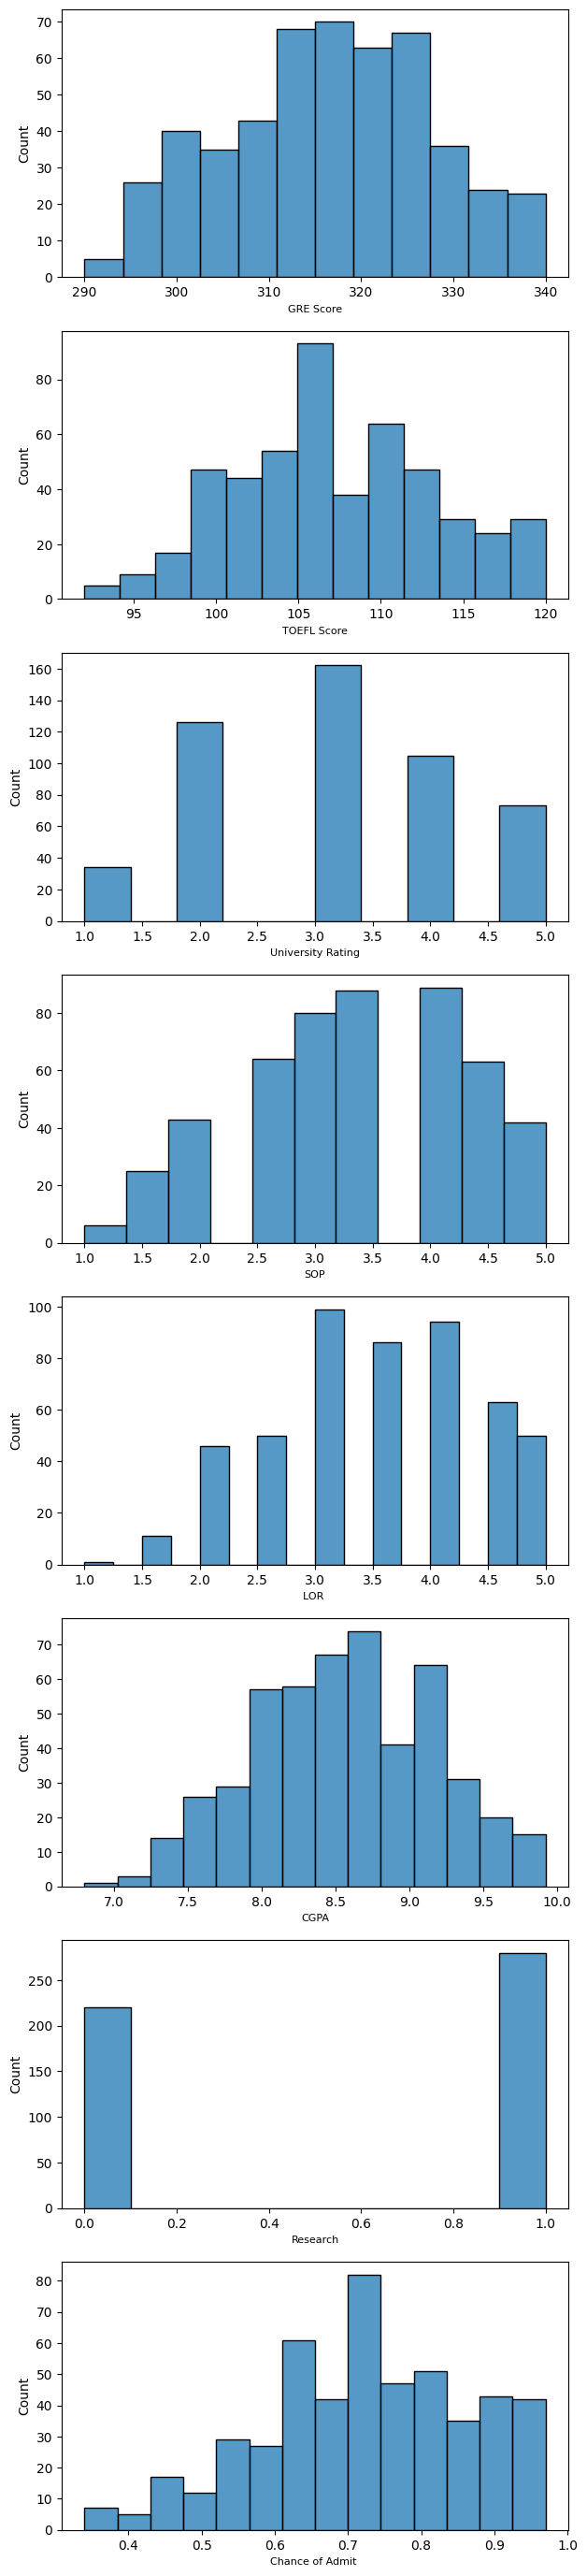

In [73]:
fig, ax = plt.subplots(len(features), figsize = (7,35))
for i, feature in enumerate(features):
  sns.histplot(df_shuffled[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

#### Box Plot and Violin Combo

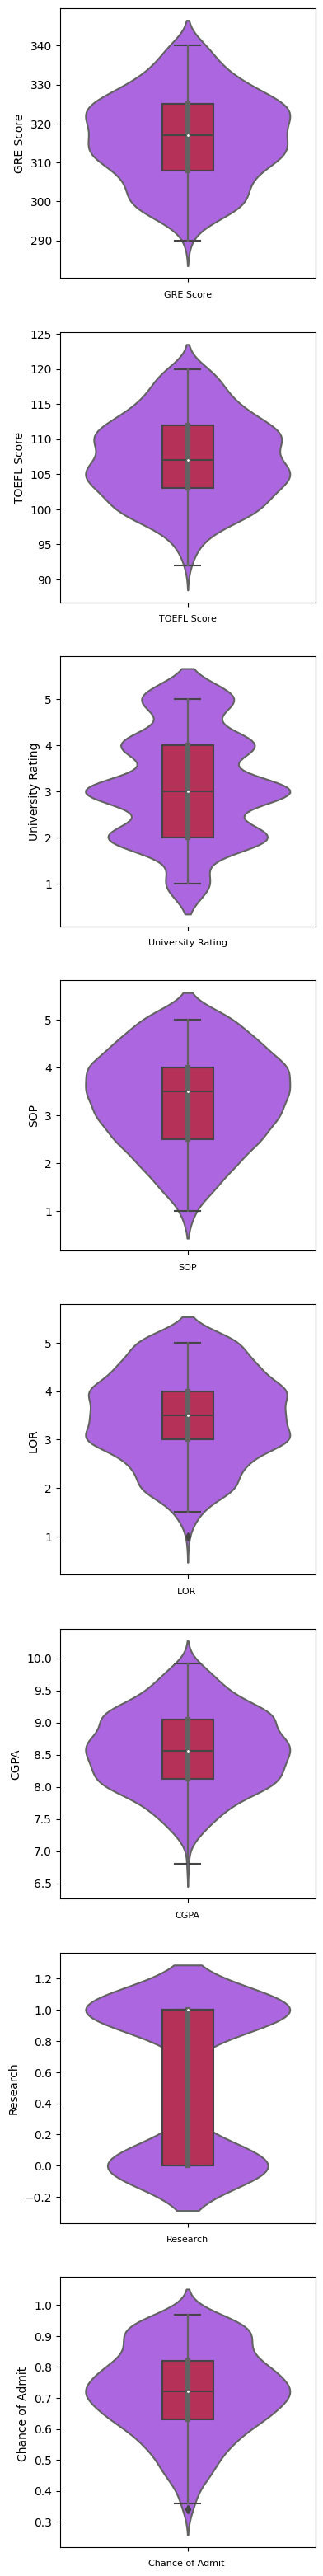

In [79]:
fig, ax = plt.subplots(len(features), figsize = (4,40))
for i, feature in enumerate(features):
  sns.boxplot(y=df_shuffled[feature], ax=ax[i], boxprops={'zorder': 2}, width=0.2, palette='rocket')
  sns.violinplot(y=df_shuffled[feature], ax=ax[i], color = "#af52f4")
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

In [80]:
df_shuffled.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Special Treatment Needed

*   Since ***Serial No.*** is not very useful in predicting admissions, it was dropped from the dataset.
*   Nothing seems out of the ordinary. None of the other attributes seem to require any special treatment.
*   As a matter of fact, attributes seem to be very well distributed. Most of the values are centered around the mean. Aside from **Research**, evidently, the attributes' values almost hint at a Gaussian distribution.






# Question C
Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

#### Scatter Plots and Correlation Coefficients

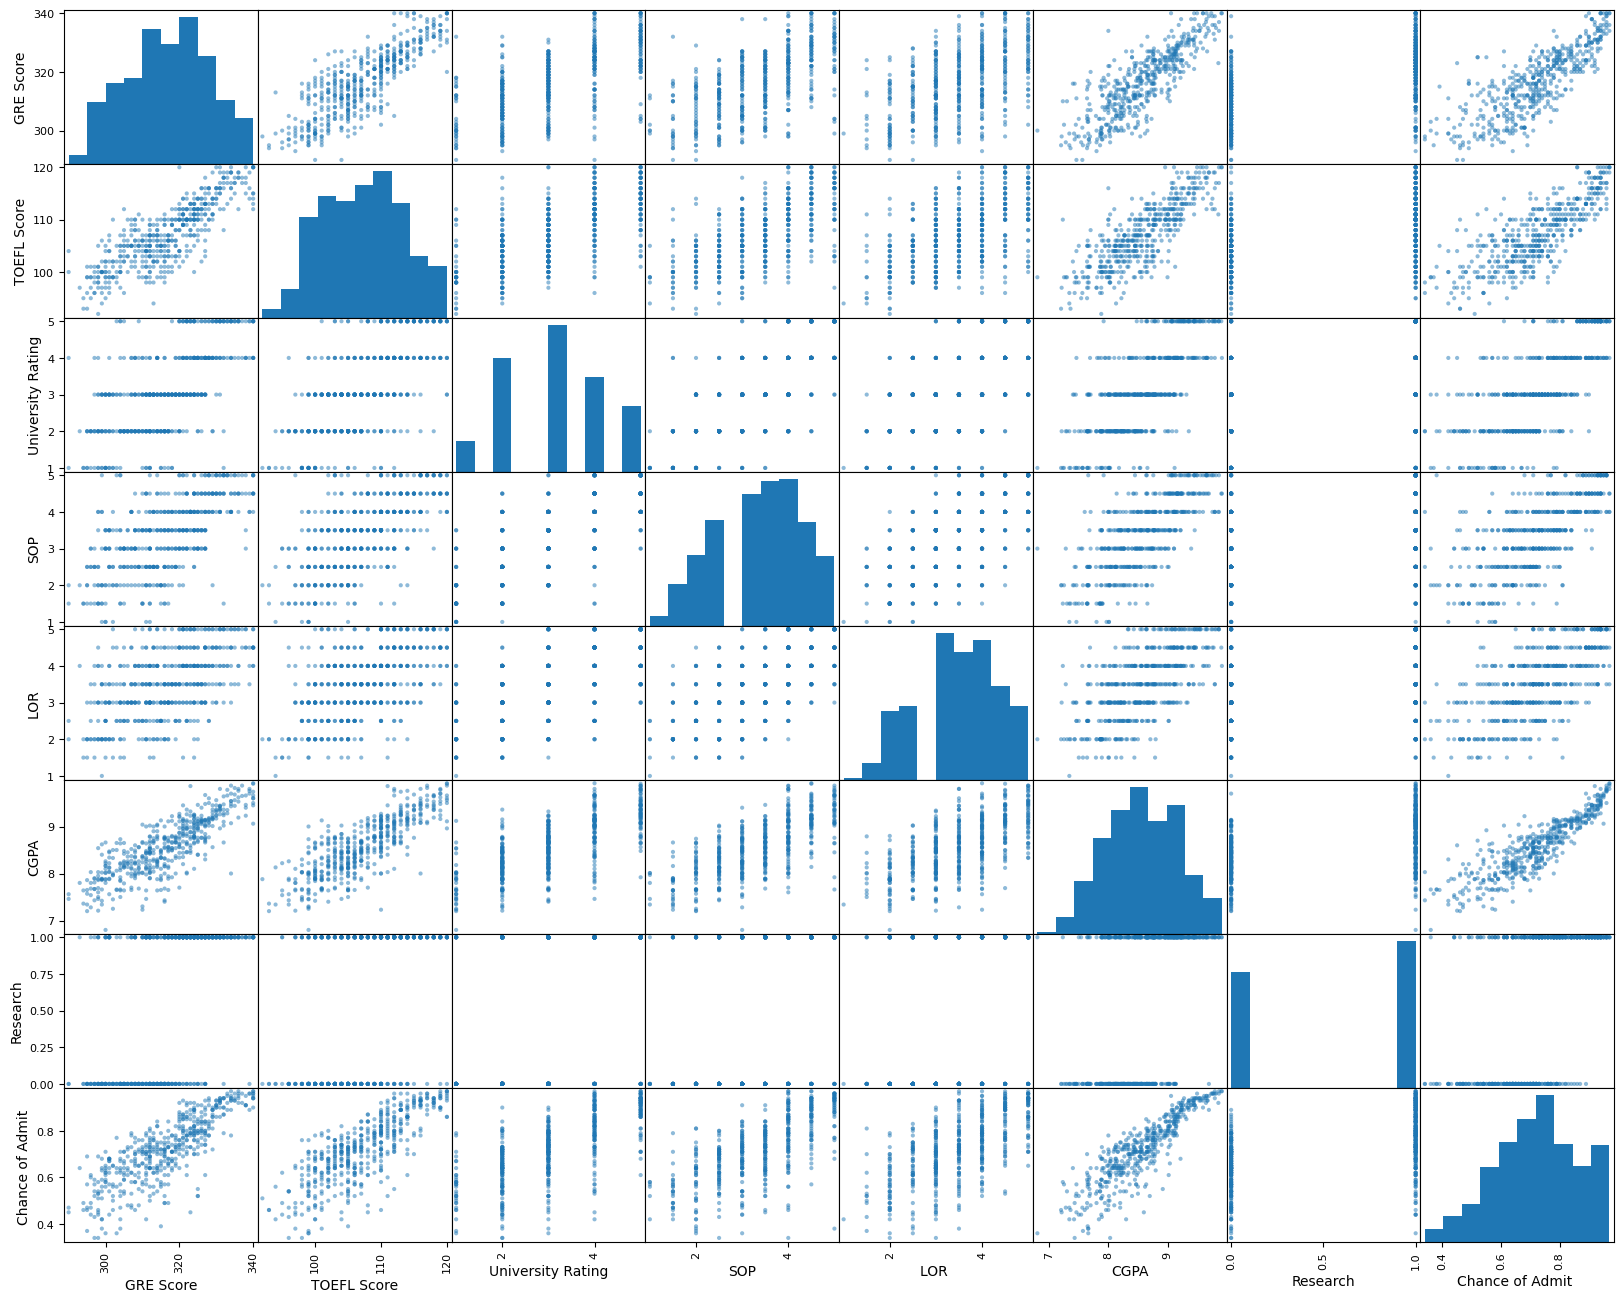

In [81]:
scatter_matrix(df_shuffled[features], figsize=(20, 16))
plt.show()

In [82]:
df_shuffled[features].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


#### PCC Table

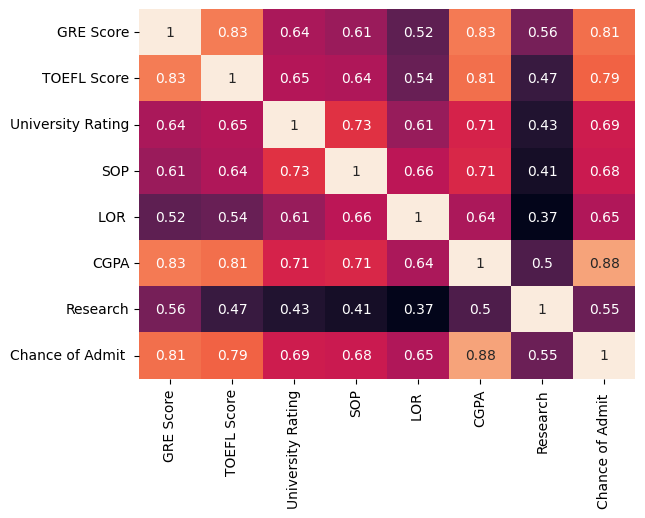

In [285]:
sns.heatmap(df_shuffled[features].corr(method = 'pearson'), cbar = False, annot = True)
plt.show()

#### Discussion


*   The ***CGPA*** is the most correlated feature with the ***Chance of Admit***. It seems like the most promising attribute to predict the chance of admission.
*   The ***TOEFL Score*** and ***GRE Score*** are close seconds to ***CGPA*** in terms of their strong correlation with ***Chance of Admit***.
*   This is makes sense, in actuality, as graduate school stress upon such scores for admission. They must be good indicators of how a student would perform if admitted.
*  ***TOEFL Score***, ***GRE Score*** and ***CGPA*** seem to be all strongly correlated among each other. Actually, these scores are fairly highly correlated with most other attributes. Manifestly, a student with higher scores is most entitled to have research experience and better SOP and LOR.







# Question D
Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset

#### Splitting Data into Test/Train

* ***CGPA*** is the most correlated attribute with the ***Chance of Admit***. So, it must be quite indicative in predicting the ***Chance of Admit***.
* To ensure that the test set is representative of the categories/ranges of CGPA in the whole dataset, we create the following ***CGPA_category*** attribute to capture categories of CGPA.
* Looking back at the histogram of the CGPA, it looks like most values range between 7.5 and 9.5. Thus, labeled from 1 to 4, are the following CGPA categories:

In [85]:
df_shuffled["CGPA_category"] = pd.cut(df_shuffled["CGPA"],
                               bins=[0, 7.5, 8.5, 9.5, np.inf],
                               labels=[1, 2, 3, 4])

In [86]:
df_shuffled["CGPA_category"].value_counts()

3    236
2    213
4     31
1     20
Name: CGPA_category, dtype: int64

<Axes: >

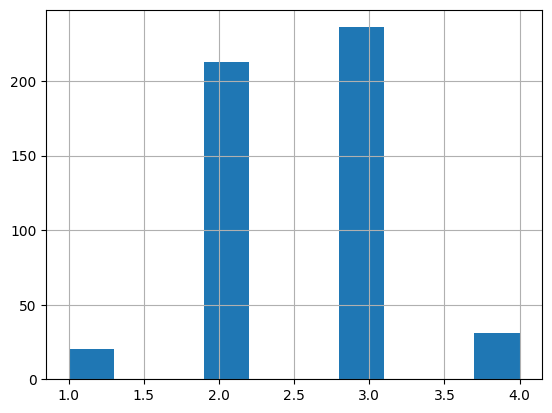

In [88]:
df_shuffled["CGPA_category"].hist()

In [89]:
strat_train_set, strat_test_set = train_test_split(df_shuffled, test_size=0.2, stratify=df_shuffled["CGPA_category"], random_state=42)

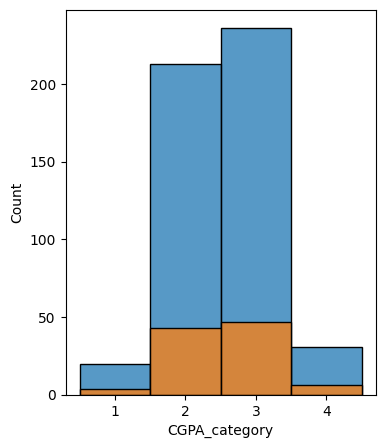

In [284]:
# test set representation of the whole dataset
fig, ax = plt.subplots(1, figsize = (4,5))
sns.histplot(df_shuffled['CGPA_category'], ax = ax)
sns.histplot(strat_test_set['CGPA_category'], ax = ax)
plt.show()

#### Verification Discussion

In [90]:
strat_test_set["CGPA_category"].value_counts() / len(strat_test_set)

3    0.47
2    0.43
4    0.06
1    0.04
Name: CGPA_category, dtype: float64

In [91]:
df_shuffled["CGPA_category"].value_counts() / len(df_shuffled)

3    0.472
2    0.426
4    0.062
1    0.040
Name: CGPA_category, dtype: float64

In [92]:
def CGPA_category_proportions(data):
    return data["CGPA_category"].value_counts() / len(data)

train_set, test_set = train_test_split(df_shuffled, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": CGPA_category_proportions(df_shuffled),
    "Stratified": CGPA_category_proportions(strat_test_set),
    "Random": CGPA_category_proportions(test_set),
}).sort_index()
compare_props["Random %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [93]:
compare_props

,Overall,Stratified,Random,Random %error,Stratified %error
1,0.040,0.04,0.05,25.000000,0.000000
2,0.426,0.43,0.49,15.023474,0.938967
3,0.472,0.47,0.41,-13.135593,-0.423729
4,0.062,0.06,0.05,-19.354839,-3.225806


*   To ensure that the test set is representative of the whole dataset, Stratified Sampling was used to create it.
*   First, the data was divided based on the ***CGPA_category*** to which each instance belongs because the ***CGPA*** has the strongest correlation with the ***Chance of Admit***, and the distribution of the most relevant feature in the training and testing sets ought to be preserved.
* Samples are picked from each ***CGPA_category*** in proportion to its size vis-à-vis the whole dataset. This way, the test set will be representative of the various CGPA categories (i.e., representative of the dataset).
*  The test set obtained using stratified sampling and the dataset show very close values in terms of the ratios of the unique ***CGPA_category*** values to the sizes of the sets. This is enough to verify that the test set is indeed representative of the entire dataset, and that the distribution of ***CGPA_category*** is maintained. For the sake of comparison (table above), the error rates of the stratified test set are far inferior to those of the randomly generated test set. This demonstrates the effect of stratified sampling in generating testing and training sets.

#Question E
Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [97]:
attributes = strat_train_set.drop("Chance of Admit ", axis=1)
labels = strat_train_set["Chance of Admit "].copy()
attributes.shape, labels.shape

((400, 8), (400,))

In [98]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.

    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

#### Closed-form Solution

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X=attributes, y=labels)

scores = cross_val_score(lin_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.07039282 0.05423218 0.06218008 0.04888565]
Mean: 0.05892268130766588
Standard Deviation: 0.00813814411396563


#### SGD

In [191]:
sgd_reg = SGDRegressor(penalty=None, tol = 1e-3, max_iter=1000, eta0=0.00001)
sgd_reg.fit(X=attributes, y=labels)

scores = cross_val_score(sgd_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.1243823  0.11836994 0.12164754 0.11187074]
Mean: 0.11906762893156486
Standard Deviation: 0.004668608482225226


In [103]:
sgd_reg_train = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, eta0=0.00001, warm_start=True, random_state=42)
sgd_reg_val = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, eta0=0.00001, warm_start=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(attributes, labels, test_size=0.2, random_state=42)

errors_training = []
errors_validation = []

for epoch in range(10000):
  sgd_reg_val.fit(X_train, y_train)
  y_predict = sgd_reg_val.predict(X_val)
  error = mean_squared_error(y_val, y_predict)
  errors_validation.append(error)

  sgd_reg_train.fit(attributes, labels)
  y_predict = sgd_reg_train.predict(attributes)
  error = mean_squared_error(labels, y_predict)
  errors_training.append(error)

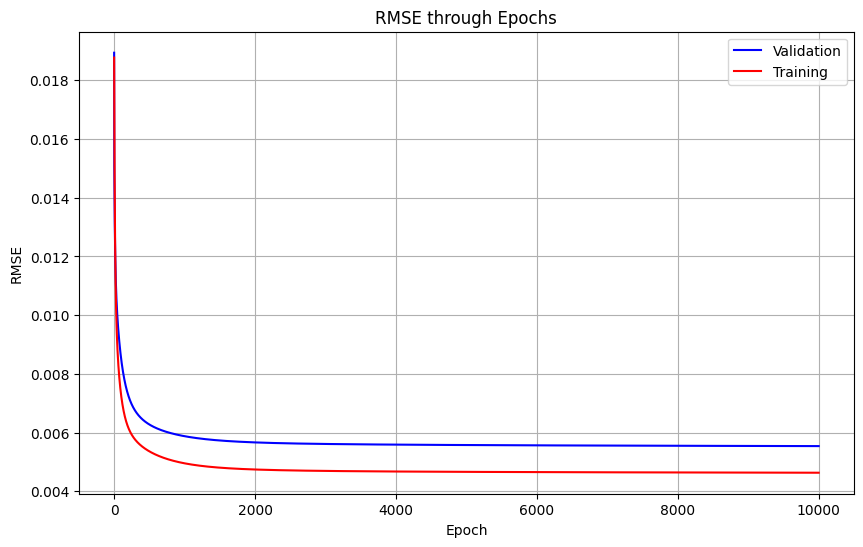

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(range(10000), errors_validation, label='Validation', color = 'blue')
plt.plot(range(10000), errors_training, label='Training', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE through Epochs')
plt.legend()
plt.grid(True)
plt.show()

*   It seems like the model does not overfit the training data. The evolvement of the training and validation losses through training iterations indicates a good balance between fitting the training data and generalizing to unseen data.

#### Regularization

In [105]:
# Ridge regression
ridge_red = Ridge(alpha=1, solver='auto')
ridge_red.fit(attributes, labels)
scores = cross_val_score(ridge_red, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.07027521 0.05472226 0.06205781 0.048597  ]
Mean: 0.05891307051109453
Standard Deviation: 0.008108204286617992


In [106]:
# Lasso regression
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(attributes, labels)
scores = cross_val_score(lasso_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.12555641 0.1194689  0.12555251 0.11463689]
Mean: 0.12130367721023297
Standard Deviation: 0.004581232878877317


In [107]:
#Elastic Net regression
elastic_reg = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_reg.fit(attributes, labels)
scores = cross_val_score(elastic_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.0991591  0.09267967 0.09825259 0.08532925]
Mean: 0.09385515012150156
Standard Deviation: 0.005512304277278116


#### Regularization with Different Penalty Terms

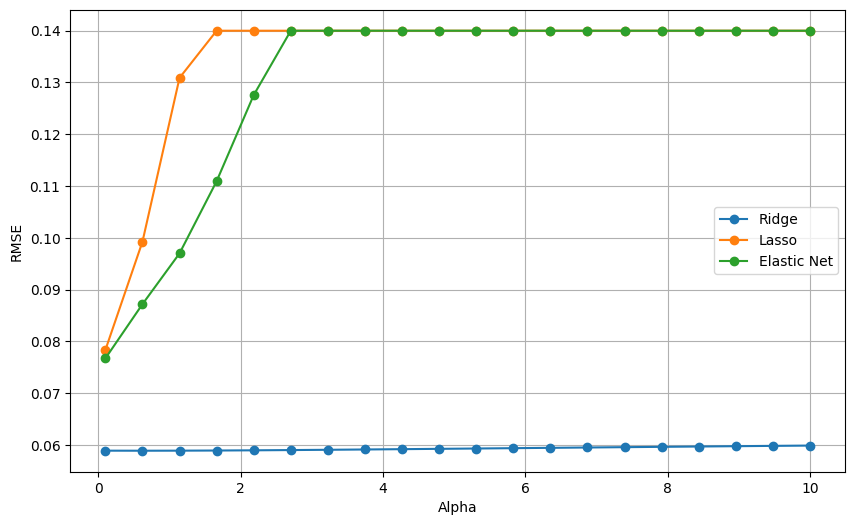

In [108]:
alpha_range = np.linspace(0.1, 10, 20)
ridge_rmse = []
lasso_rmse = []
elastic_rmse = []

for x in alpha_range:
  ridge_red = Ridge(alpha=x, solver='auto')
  lasso_reg = Lasso(alpha=x)
  elastic_reg = ElasticNet(alpha=x, l1_ratio=0.5)
  scores_ridge = cross_val_score(ridge_red, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_lasso = cross_val_score(lasso_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_elastic_net = cross_val_score(elastic_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_ridge = np.sqrt(-scores_ridge)
  scores_lasso = np.sqrt(-scores_lasso)
  scores_elastic_net = np.sqrt(-scores_elastic_net)
  ridge_rmse.append(scores_ridge.mean())
  lasso_rmse.append(scores_lasso.mean())
  elastic_rmse.append(scores_elastic_net.mean())

plt.figure(figsize=(10, 6))

# Plot RMSE values for Ridge
plt.plot(alpha_range, ridge_rmse, label='Ridge', marker='o', linestyle='-')

# Plot RMSE values for Lasso
plt.plot(alpha_range, lasso_rmse, label='Lasso', marker='o', linestyle='-')

# Plot RMSE values for Elastic Net
plt.plot(alpha_range, elastic_rmse, label='Elastic Net', marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   With alpha taking different values between 0.1 and 10, it appears that Ridge regression brings about the lowest RMSE values, notably, with alpha closer to 0. This suggests, that  only slight regularization is needed for a better performance, which is convenient since all features will remain in the model.
* Same goes for Lasso and Elastic Net, RMSE values increase as aplha values grow larger.
*   This behavior is normal as the model is already simple, and there are merely a few features. So, only little to no regularization is required for a better performance.




#### Hyper parameter Tuning and Description

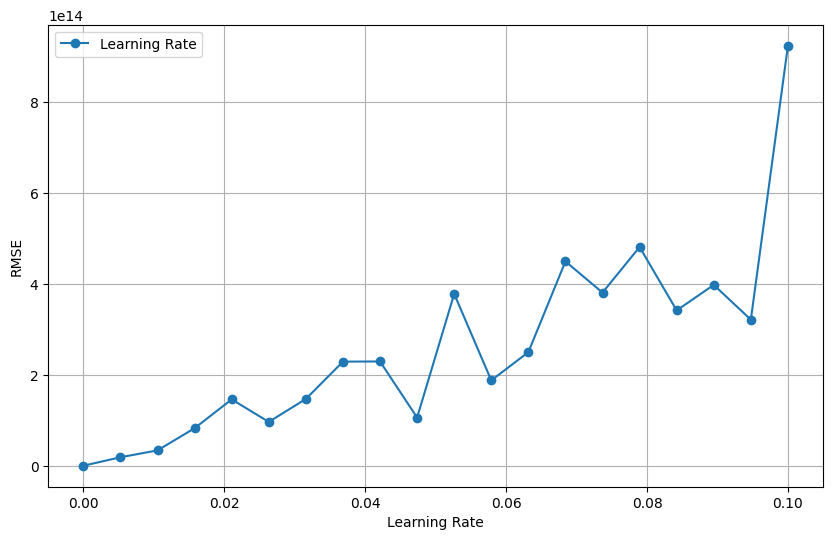

In [187]:
# Learning rates
learning_rates = np.linspace(0.00001, 0.1, 20)
lr_rmse = []

for x in learning_rates:
  sgd_reg = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, eta0=x)
  sgd_reg.fit(X=attributes, y=labels)
  scores = cross_val_score(sgd_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  lr_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(learning_rates, lr_rmse, label='Learning Rate', marker='o', linestyle='-')

plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

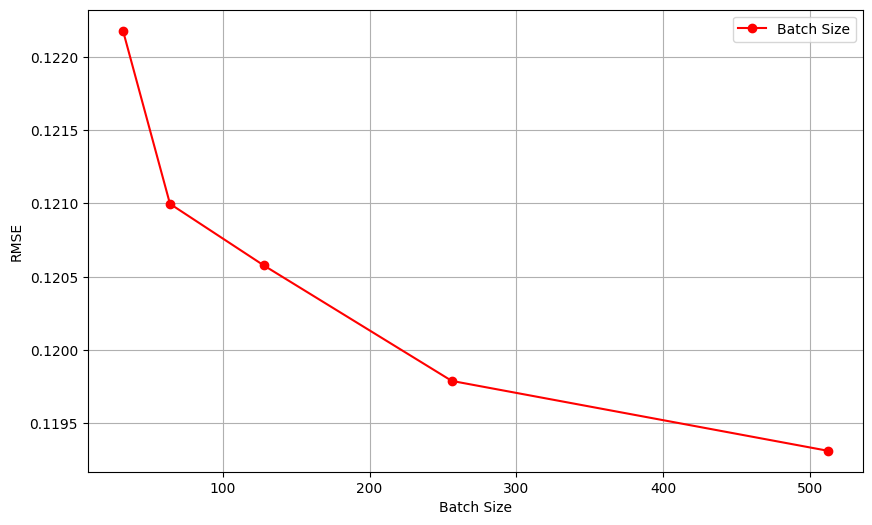

In [188]:
#Batch sizes
batch_sizes = [32, 64, 128, 256, 512]
batch_rmse = []

np.random.seed(42)

X = np.array(attributes)
y = np.array(labels)

sgd_reg = SGDRegressor(penalty=None, tol=1e-3, max_iter=10000, eta0=0.00001)

for batch_size in batch_sizes:
  shuffled_indices = np.random.permutation(len(attributes))
  X_shuffled = X[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, attributes.shape[0], batch_size):
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]
    sgd_reg.fit(X_batch, y_batch)
  scores = cross_val_score(sgd_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  batch_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(batch_sizes, batch_rmse, label='Batch Size', marker='o', color='r', linestyle='-')

plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   Upon fine tuning the model, it is safe to say that the following hyperparameters would optimize its performance:
  * Penalty: l2 (Ridge regression with alpha as low as 0.1)
  * Learning rate: 0.00001
  * Batch size: 512


# Question F
Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data

#### Closed-form Solution

In [152]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
attributes_poly = poly_features.fit_transform(attributes)

In [125]:
attributes.shape

(400, 8)

In [126]:
attributes_poly.shape

(400, 44)

In [148]:
lin_reg_pol = LinearRegression()
lin_reg_pol.fit(X=attributes_poly, y=labels)
scores = cross_val_score(lin_reg, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.10083629 0.12151943 0.11681228 0.14970604]
Mean: 0.12221851108741759
Standard Deviation: 0.01762441330637295


*   Polynomial regression of degree 2 yielded the best performance as opposed to higher degrees that exhibited high variability across validation scores indicating overfitting.

#### SGD

In [155]:
X_train, X_val, y_train, y_val = train_test_split(attributes_poly, labels, test_size=0.2, random_state=42)

sgd_reg_pol = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, eta0=0.00001, warm_start=True, random_state=42)

train_losses = []
val_losses = []

epochs = 10000

for epoch in range(epochs):

  sgd_reg_pol.fit(X_train, y_train)

  y_train_predict = sgd_reg_pol.predict(X_train)
  train_loss = mean_squared_error(y_train, y_train_predict)
  train_losses.append(train_loss)

  y_val_predict = sgd_reg_pol.predict(X_val)
  val_loss = mean_squared_error(y_val, y_val_predict)
  val_losses.append(val_loss)

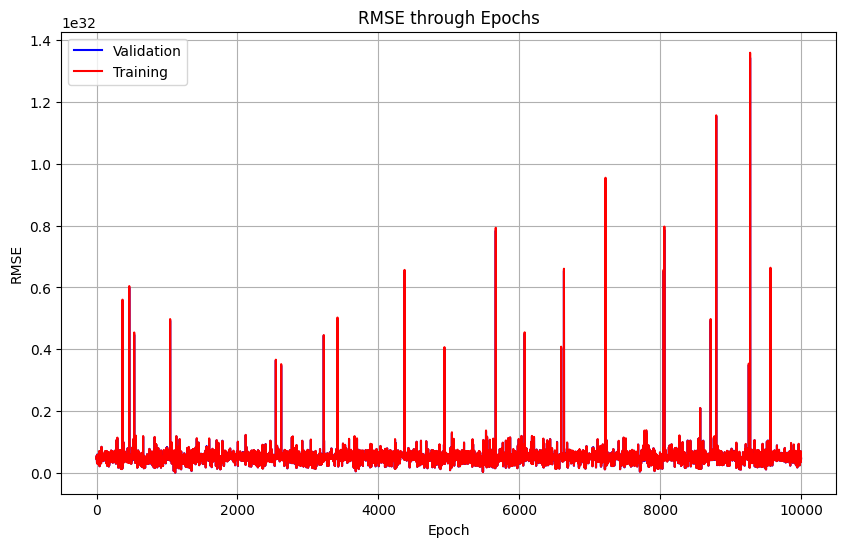

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(range(10000), val_losses, label='Validation', color = 'blue')
plt.plot(range(10000), train_losses, label='Training', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE through Epochs')
plt.legend()
plt.grid(True)
plt.show()

*   The graph shows that the model does not overfit the training data since the validation and training curves are almost indistinguishable (one on top of the other).
*   RMSE values fluctuate, but they converge eventually to a minimum. The curves portray the behavior of stochastic gradient descent as the cost function keeps on bouncing up and down.


#### Regularization

In [160]:
# Ridge regression
ridge_reg_pol = Ridge(alpha=1, solver='auto')
ridge_reg_pol.fit(attributes_poly, labels)
scores = cross_val_score(ridge_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.07061197 0.05227277 0.06273013 0.04934842]
Mean: 0.05874082119811355
Standard Deviation: 0.008468940749333315


In [163]:
# Lasso regression
lasso_reg_pol = Lasso(alpha=1)
lasso_reg_pol.fit(attributes_poly, labels)
scores = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.07058165 0.05778268 0.06283255 0.05117434]
Mean: 0.0605928055721686
Standard Deviation: 0.007095734291740501


In [164]:
# Elastic Net regression
elastic_reg_pol = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_reg_pol.fit(attributes_poly, labels)
scores = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.07028968 0.05597102 0.06222197 0.04972746]
Mean: 0.05955253244886399
Standard Deviation: 0.007612020624480657


#### Regularization with Different Penalty Terms

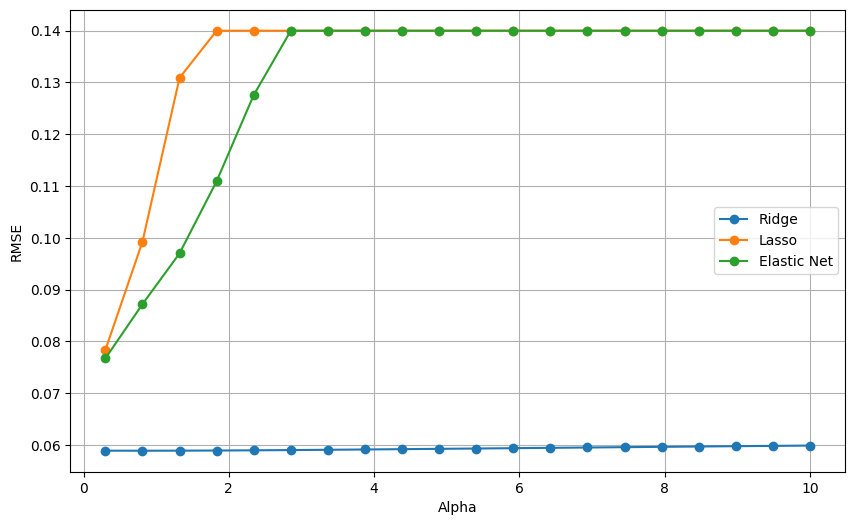

In [172]:
alpha_range = np.linspace(0.3, 10, 20)
ridge_pol_rmse = []
lasso_pol_rmse = []
elastic_pol_rmse = []

for x in alpha_range:
  ridge_red_pol = Ridge(alpha=x, solver='auto')
  lasso_reg_pol = Lasso(alpha=x)
  elastic_reg_pol = ElasticNet(alpha=x, l1_ratio=0.5)
  scores_ridge_pol = cross_val_score(ridge_red_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_lasso_pol = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_elastic_net = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_ridge_pol = np.sqrt(-scores_ridge_pol)
  scores_lasso_pol = np.sqrt(-scores_lasso_pol)
  scores_elastic_net_pol = np.sqrt(-scores_elastic_net)
  ridge_pol_rmse.append(scores_ridge.mean())
  lasso_pol_rmse.append(scores_lasso_pol.mean())
  elastic_pol_rmse.append(scores_elastic_net.mean())

plt.figure(figsize=(10, 6))

# Plot RMSE values for Ridge
plt.plot(alpha_range, ridge_rmse, label='Ridge', marker='o', linestyle='-')

# Plot RMSE values for Lasso
plt.plot(alpha_range, lasso_rmse, label='Lasso', marker='o', linestyle='-')

# Plot RMSE values for Elastic Net
plt.plot(alpha_range, elastic_rmse, label='Elastic Net', marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   Increasing alpha can decrease variability across validation scores and help mitigate overfitting. On the other hand, bias increases. This is illustrated in the figure above, as alpha values increase, RMSE values increase as well which indicates underfitting.
*   The model is still not complex enough to require strong regularization, using Elastic Net or Lasso, with alpha values greater than 0.3. The number of features is moderate which justifies not doing any feature selection using Lasso or Elastic Net.
* Ridge regression, however, with alpha closer to 0, shows the best performance.




#### Hyperparameter Tuning and Description

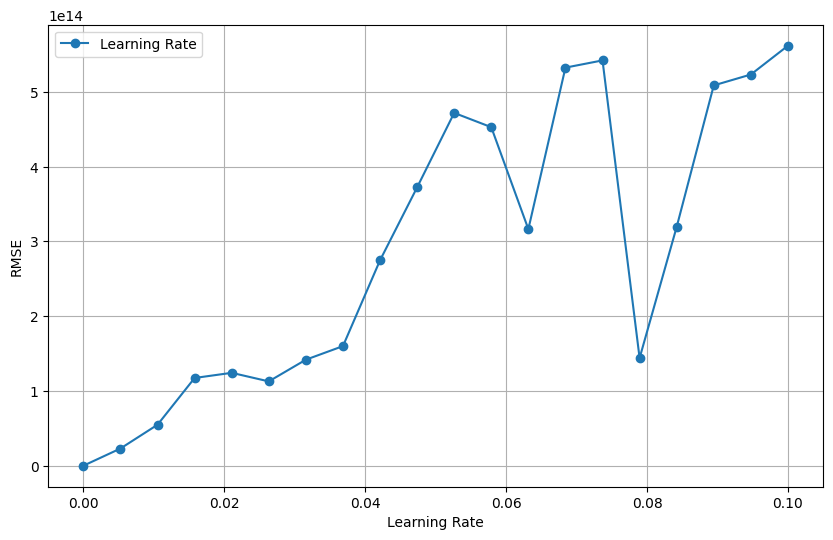

In [189]:
# Learning rates
learning_rates = np.linspace(0.00001, 0.1, 20)
lr_rmse = []

for x in learning_rates:
  sgd_reg_pol = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, eta0=x)
  sgd_reg_pol.fit(X=attributes_poly, y=labels)
  scores = cross_val_score(sgd_reg_pol, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  lr_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(learning_rates, lr_rmse, label='Learning Rate', marker='o', linestyle='-')

plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

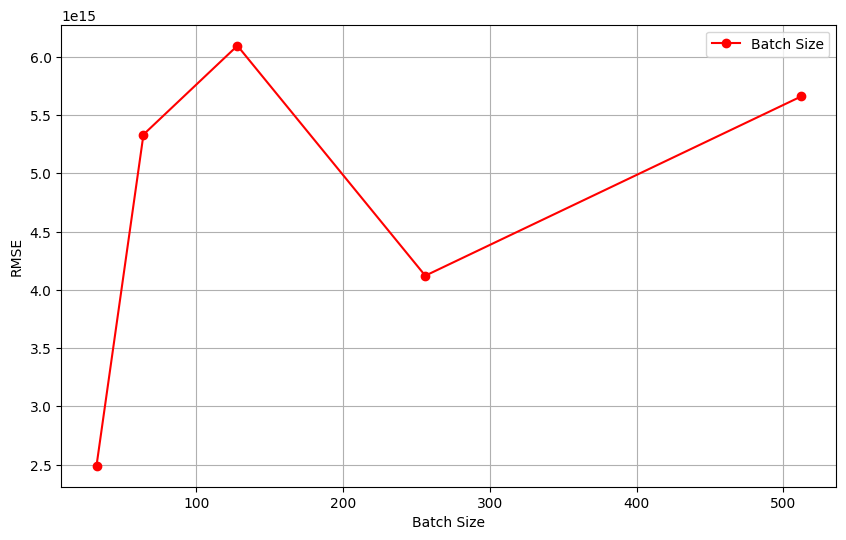

In [190]:
# Batch sizes
batch_sizes = [32, 64, 128, 256, 512]
batch_rmse = []

np.random.seed(42)

y = np.array(labels)

sgd_reg_pol = SGDRegressor(penalty=None, tol=1e-3, max_iter=10000, eta0=0.00001)

for batch_size in batch_sizes:
  shuffled_indices = np.random.permutation(len(attributes_poly))
  X_shuffled = attributes_poly[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, attributes_poly.shape[0], batch_size):
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]
    sgd_reg_pol.fit(X_batch, y_batch)
  scores = cross_val_score(sgd_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  batch_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(batch_sizes, batch_rmse, label='Batch Size', marker='o', color='r', linestyle='-')

plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   Upon fine tuning the polynomial regression model, it is safe to say that the following hyperparameters would optimize its performance:
  * Penalty: l2 (Ridge regression with alpha as low as 0.3)
  * Learning rate: 0.00001
  * Batch size: 32

#Question G
Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

#### Trained Model with Hyperparameters

*   The best model overall would be the SGD linear regression model with the fine-tuned hyperparameters.
* After training the model with Ridge regression and with no penalty, it turned out that it performs better without any regularization.
* Likewise, it also turned out that plain SGD performs slightly better than mini-batch SGD with 512 as the batch size. This is probably due to trying out only a small selection of batch sizes. It could also be due to not using grid search and, actually; testing out the best combination of hyperparameters instead of evaluating hyperparameters individually.



In [241]:
X_train, X_val, y_train, y_val = train_test_split(attributes, labels, test_size=0.2, random_state=42)

learning_rate = 1e-05
#batch_size = 512
epochs = 10000

#alpha = 0.1

#X = np.array(X_train)
#y = np.array(y_train)

sgd_reg_final = SGDRegressor(penalty = None,
                              #alpha=alpha,
                              tol = 1e-3,
                              max_iter = 10000,
                              eta0 = learning_rate,
                              warm_start=True,
                              random_state=42)

train_losses = []
val_losses = []

for epoch in range(epochs):

  #shuffled_indices = np.random.permutation(len(X_train))
  #X_shuffled = X[shuffled_indices]
  #y_shuffled = y[shuffled_indices]

  #for i in range(0, X_train.shape[0], batch_size):
    #X_batch = X_shuffled[i:i+batch_size]
    #y_batch = y_shuffled[i:i+batch_size]
    #sgd_reg_final.fit(X_batch, y_batch)

  sgd_reg_final.fit(X_train, y_train)

  y_train_predict = sgd_reg_final.predict(X_train)
  train_loss = mean_squared_error(y_train, y_train_predict)
  train_losses.append(train_loss)

  y_val_predict = sgd_reg_final.predict(X_val)
  val_loss = mean_squared_error(y_val, y_val_predict)
  val_losses.append(val_loss)

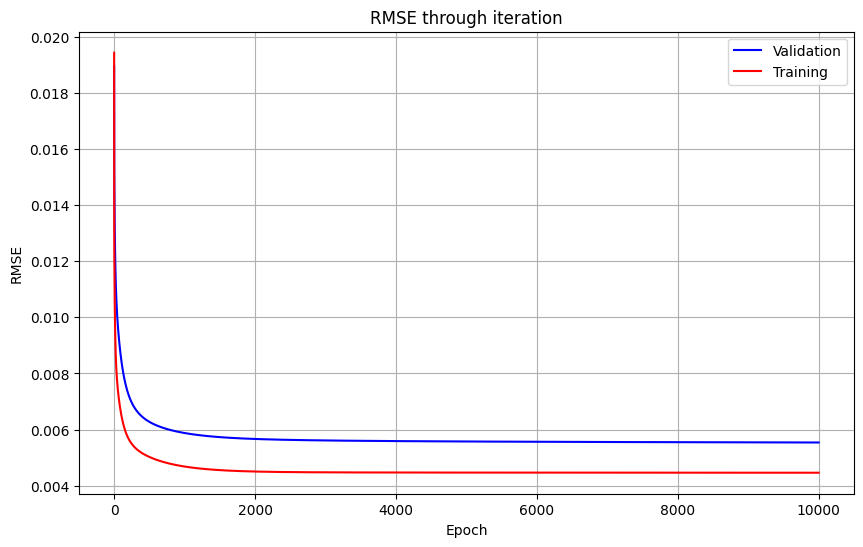

In [242]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), val_losses, label='Validation', color = 'blue')
plt.plot(range(epochs), train_losses, label='Training', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE through iteration')
plt.legend()
plt.grid(True)
plt.show()

In [248]:
# the coefficients
dict(zip(attributes.columns, sgd_reg_final.coef_))

{'GRE Score': -0.0021231071582453096,
 'TOEFL Score': 0.00512998717160416,
 'University Rating': 0.0042265828440445135,
 'SOP': 0.017161537390329346,
 'LOR ': 0.011728247599596876,
 'CGPA': 0.06952699000463283,
 'Research': 0.047163187090372004,
 'CGPA_category': 0.045766617177700364}

In [250]:
# the Intercept
sgd_reg_final.intercept_

array([-0.02400483])

#### Making Predictions

In [243]:
attributes_test = strat_test_set.drop("Chance of Admit ", axis=1)
labels_test = strat_test_set["Chance of Admit "].copy()
attributes_test.shape, labels_test.shape

((100, 8), (100,))

In [255]:
predictions = sgd_reg_final.predict(attributes_test)

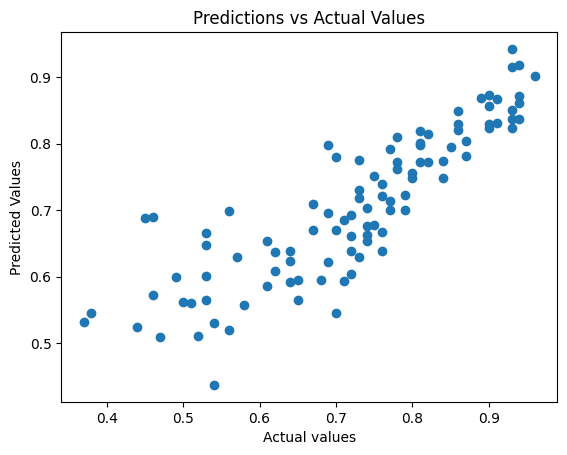

In [281]:
plt.scatter(labels_test, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

#### Evaluation Metric

In [268]:
evaluation_metrics = pd.DataFrame({'Metric':['MAE','MSE','RMSE','R-Squared'],
                          'Value':[metrics.mean_absolute_error(labels_test, predictions),
                                   metrics.mean_squared_error(labels_test, predictions),
                                   np.sqrt(metrics.mean_squared_error(labels_test, predictions)),
                                   metrics.explained_variance_score(labels_test, predictions)]})

In [269]:
evaluation_metrics

,Metric,Value
0,MAE,0.060799
1,MSE,0.005831
2,RMSE,0.076359
3,R-Squared,0.736922


*   Since the evaluation metrics' values are all close to 0, we can conclude that the model's performance is very good as it predicts values that are close to the actual chances of admission.
*   RMSE would be the evaluation metric of choice in this case seen that it is a very common regression evaluation metric that has the same units as the target variable making it easily interpretable.
* According to RMSE, the predictions of the model differ by approximatly 0.076 units from the actual value. In other words, the model is correct around 93% of the time.





#### Summary and Future Work

*   The linear regression model perfoms very well as it predicts the chance of admission based on different features.
*   The ***CGPA***, ***TOEFL Score*** and ***GRE Score*** are regarded to be the most promising features in predicting the change of admission. They could also be insightful in predicting one another as scores as well as ***Research***, ***SOP*** and ***LOR*** strengths.
* The model is very simple and the dataset is just as simple. With more data (more than 500 entries), the model could perfom better.
* More features could be added to the model for better accuracy such as the acceptance rate of the university and grades in selected subjects.
* Future work would touch upon using grid search to fine-tune the model. This would yield better hyperparameters through assessing different combinations rather than testing each hyperparameter on its own.
* As simple as it is, this model could be actually helpful for graduate students to match schools with their profiles.

